<a href="https://colab.research.google.com/github/Mike-in-Maine/Book-Price-Prediction-Holiday-Version-/blob/main/High_Code_SVHN_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [168]:
# Mounting Google Colab drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the necessary libraries**

In [169]:
import random

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization

from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from tensorflow.keras import backend

backend.clear_session()

**Let us check the version of tensorflow.**

In [170]:
print(tf.__version__)

2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [171]:
import h5py #This is the python library that opens the HDF5 files
file_path = '/content/drive/MyDrive/MIT/elective_project/SVHN_single_grey1.h5'

with h5py.File(file_path, 'r') as f:
    print(list(f.keys()))  # This will print the keys at the root level (as a list), a little peak inside to see how the dataset is setup. The keys will be the equivalent of pandas columns

    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]


['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Check the number of images in the training and the testing dataset.

In [172]:
len(X_train), len(X_test)

# This is not required for now, but we can look inside the X_train set and see what is inside the first set.
#print(X_train[0])
#print(len(X_train[0]))
# We discovered that each image is a 32x32 pixel image in a form of a np matrix.

(42000, 18000)

**Observation:**
There are 42,000 images in the Training set and 18,000 images in the Testing set. Each image is a matrix of numbers, which in turn contains the vales of the individual pixels.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

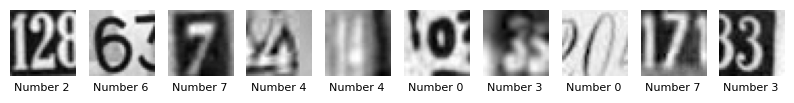

In [173]:
#Since the images are in the form of a matrix, we can use the handy function from Matplotlib called "figure".
#It creates a blank canvas in which the individual pixes are plotted.
plt.figure(figsize = (10, 1))

#We iterate through the first 10 images (matrices).
for i in range(10):

    # iterates through the subplot, 1 number of rows, 10 numer of columns and iterator for individual images.
    plt.subplot(1, 10, i+1)

    # We insert each image into the canvas we created and show it with a contrast color map called "jet'.
    # Note: these are not real colors in the image, but only to signify the difference between the numbers of the matrix.
    plt.imshow(X_train[i], cmap='gray')

    # Lets turn the labels and the axis off since they will be inthe way of seeing the image as it is.
    plt.axis('off')

    # We can show the labels from Y_train set for each number
    plt.text(15, 40, f'Number {y_train[i]}', ha='center', va='bottom', color='black', fontsize=8)
# Plots the result of the for loop.
plt.show()


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Print the shapes of Training and Test data

In [174]:
# Prints the shape of the first dataset with is 32 pixels by 32 pixels, hence a matrix of 1024 total pixels.
# If the image was in color RGB, each "channel" will have its own matrix of 32x32 pixels, making the calculations a lot more cumbersome.
# Lets stick with black and white pitures (grayscale with 255 graduation of gray with 0 being black and 255 white)
print("Shape:", X_train[0].shape)

Shape: (32, 32)


In [175]:
# Lets take a look at the first image in terms of numerical matrix.
print("First image:\n", X_train[0])

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [176]:
# Flattens the dataset by using reshaping fom numpy into 1D array without changing the data. Just the shape.
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

In [177]:
# Prints the shape of the Training and Test data sets.
print("Train data shape set:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Train data shape set: (42000, 1024) (42000,)
Test data shape: (18000, 1024) (18000,)


### **Normalize the train and the test data**

In [178]:
# Normalizing data means fitting all data in a 0-1 interval.
# Normalized Value= Max Value/Original Value

# Normalize reshaped training data
X_train_normalized = X_train / 255.0

# Normalize reshaped testing data
X_test_normalized = X_test / 255.0

### **One-hot encode output**

In [179]:
# This part turns the categorical values into a matrix so that it can be used in a context of comparing and pairing it to the other matrices contained in X_train which are all pictures.

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

In [180]:
# Prints the list of all the labels

print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


**Observation:**
To be noted that if we want to see the first element of the list, it will show an interesting set:

print(y_test[0])

[0,1,0,0,0,0,0,0,0,0] <--- this means, that the label has been "hot-encoded" for the number 2 (second element has a 1), which is also the number corresponding in our X_train.
So the labels are corresponding the correct images.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [181]:
# Lets set up a seed of 42 for now and see if it works well. We need to se it up the same in all random generators in order to maintain reproducibility.

# In NumPy
np.random.seed(42)

# In the generic python funcion
random.seed(42)

# And TensorFlow
tf.random.set_seed(42)

# I also set up a function for seed selection here so I can reuse it later.

def seed_setup():
  np.random.seed(42)
  random.seed(42)
  tf.random.set_seed(42)


### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [182]:
input_shape = 1024 # the 32x32 images
num_classes = 10 # how many different categories of images we have (1,2,3,4,5,6,7,8,9,0)

def nn_model_1(input_shape, num_classes):
    # Create a Sequential Model. It is a simple model in which there is one tensor as input and one as output
    model = Sequential()

    # First hidden layer with 64 nodes and ReLU activation
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))

    # Second hidden layer with 32 nodes and ReLU activation
    model.add(Dense(32, activation='relu'))

    # Output layer with 'softmax' activation and number of nodes equal to the number of classes
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model using categorical crossentropy whch is a commonly used loss function for multi-class classification problems
    # where each sample belongs to exactly one class out of two or more classes, like in our case.
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

    return model

    # Create the model
model = nn_model_1(input_shape, num_classes)

# Print the summary of the model
model.summary()

# Fit the model on the train data with a validation split of 0.2
history = model.fit(X_train_normalized, y_train,
                    validation_split=0.2,
                    batch_size=128,
                    verbose=1,
                    epochs=20)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
263/263 [==============================] - 3s 7ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 5ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [============

### **Plot the Training and Validation Accuracies and write down your Observations.**

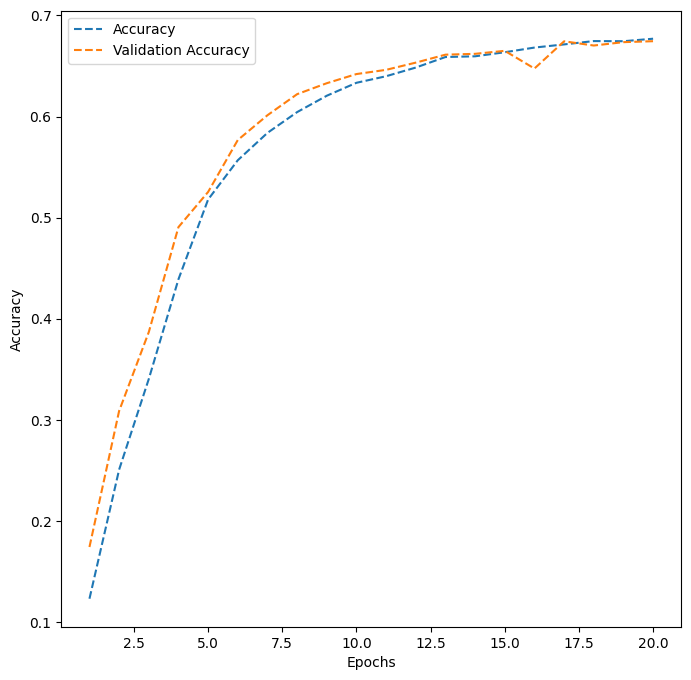

In [183]:
# Plotting the accuracies together.

# Extracts the training history from a Keras model and stores it in a dictionary. This is useful since dictionaries in python are pairs
# of key-values, just like the project we are working on.
dict_hist = history.history

# Creates a list of all Epochs
list_ep = [i for i in range(1, 21)]

# Creates a space to plot the graph in MatPlotLib
plt.figure(figsize = (8, 8))

# Plots the first line Accuracy
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'Accuracy')

# Plots the second line Validation Accuracy
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'Validation Accuracy')

# Sets the label for axis Y
plt.ylabel('Accuracy')

# Sets the label for axis X
plt.xlabel('Epochs')

# Sets the legend for the graph
plt.legend()

# Plotsthe actual graph on the screen.
plt.show()

**Observations:**

Generally speaking the accuracy increases with both training data and validation data which is a positive sign of good preformance of the model.

**Overfitting or Underfitting:** the 2 accuracies are pretty similar so there is a high chance that this model does not over fit nor underfit.

**Convergence and Stability:**
The lines are converging towards the end and through the entire process which is a good indication of leraning rate. There is a drop in Epoch 16 which then is corrected towards the end. It is possible that since the validation accuracy drops suddenly at Epoch 16, the model could be stopped at Epoch 15, however after Epoch 16 the moder performs well again. Perhaps this was due to some noise.

**Epoch Selection:**
This seems fine since the model is not overfitting or underfitting.



Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [184]:
# Clearing the backend in Keras
backend.clear_session()

#Calling our handy function to reset the seed
seed_setup()


### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [185]:
input_shape = 1024 # the 32x32 images
num_classes = 10 # how many different categories of images we have (1,2,3,4,5,6,7,8,9,0)

def nn_model_2(input_shape, num_classes):
    model = Sequential()

    # First hidden layer with 256 nodes and ReLU activation
    model.add(Dense(256, activation='relu', input_shape=(input_shape,)))

    # Second hidden layer with 128 nodes and ReLU activation
    model.add(Dense(128, activation='relu'))

    # Add Dropout layer with a rate of 0.2
    model.add(Dropout(0.2))

    # Third hidden layer with 64 nodes and ReLU activation
    model.add(Dense(64, activation='relu'))

    # Fourth hidden layer with 64 nodes and ReLU activation
    model.add(Dense(64, activation='relu'))

    # Fifth hidden layer with 32 nodes and ReLU activation
    model.add(Dense(32, activation='relu'))

    # Add BatchNormalization layer
    model.add(BatchNormalization())

    # Output layer with 'softmax' activation and number of nodes equal to the number of classes
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(learning_rate=0.0005),
                  metrics=['accuracy'])

    return model

# Create the model using the nn_model_2 function
model_2 = nn_model_2(input_shape, num_classes)

# Print the summary of the model
model_2.summary()

# Fit the model on the train data with a validation split of 0.2
history = model_2.fit(X_train_normalized, y_train,
                    validation_split=0.2,
                    batch_size=128,
                    verbose=1,
                    epochs=30)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

### **Plot the Training and Validation Accuracies and write down your Observations.**

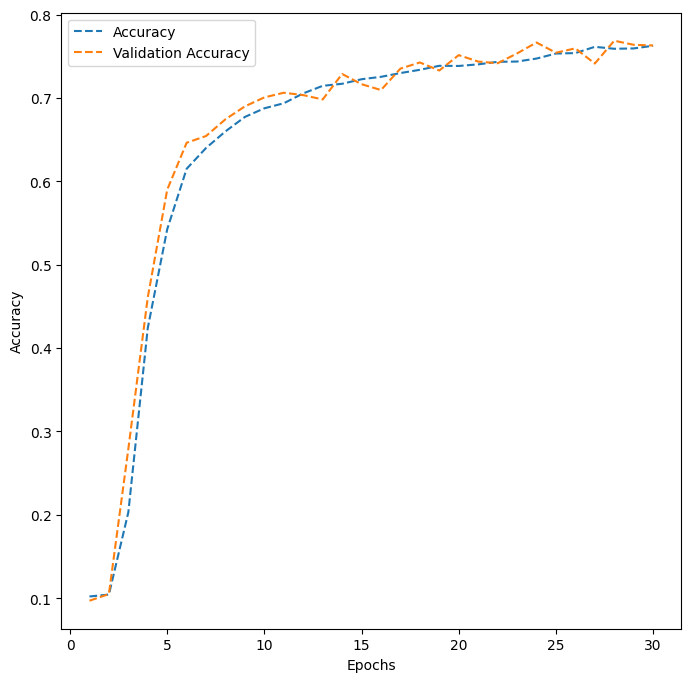

In [186]:
# Plotting the accuracies together.

# Extracts the training history from a Keras model and stores it in a dictionary. This is useful since dictionaries in python are pairs
# of key-values, just like the project we are working on.
dict_hist = history.history

# Creates a list of all Epochs
list_ep = [i for i in range(1, 31)]

# Creates a space to plot the graph in MatPlotLib
plt.figure(figsize = (8, 8))

# Plots the first line Accuracy
plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'Accuracy')

# Plots the second line Validation Accuracy
plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'Validation Accuracy')

# Sets the label for axis Y
plt.ylabel('Accuracy')

# Sets the label for axis X
plt.xlabel('Epochs')

# Sets the legend for the graph
plt.legend()

# Plotsthe actual graph on the screen.
plt.show()

**Observations:**

The biggest take from this graph is this: while training accuracy increases (blue line), after Epoch 7, the validation accuracy is somewhat segmented, even though it is higher than training accuracy. The model might not be generalizing well and picking up some noise.
There could be a couple of resons:

1.   The model is too complex with too many layers and might be overfitting
2.   The model might produce excessive amount of noise data


In other words, adding more complexity to an ANN model might not lead to a more accurate result.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [190]:
#
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 3ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [188]:
# Converts back to the original labels from the matrix coded by one-hot-encoding.
y_test = np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1814
           1       0.57      0.73      0.64      1828
           2       0.69      0.74      0.71      1803
           3       0.62      0.66      0.64      1719
           4       0.64      0.82      0.72      1812
           5       0.71      0.63      0.67      1768
           6       0.82      0.65      0.72      1832
           7       0.58      0.84      0.69      1808
           8       0.83      0.54      0.65      1812
           9       0.74      0.62      0.67      1804

    accuracy                           0.68     18000
   macro avg       0.71      0.68      0.68     18000
weighted avg       0.71      0.68      0.68     18000



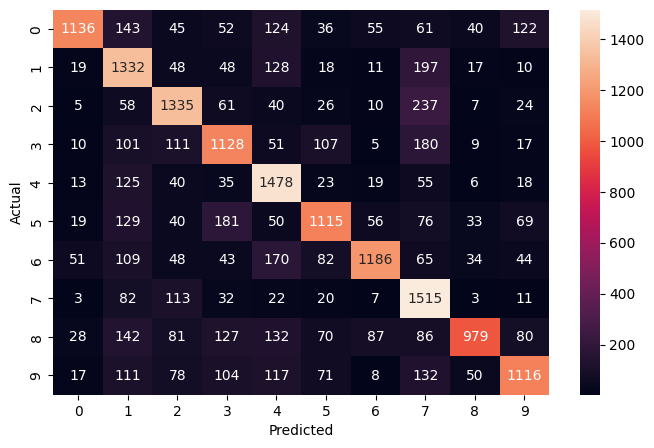

In [193]:
# Printing the classification report using the sklearn method.

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix using another sklearn method.

cm = confusion_matrix(y_test, test_pred)

# Plots the confusion matrix
plt.figure(figsize = (8, 5))

# Uses seaborn library to show the heatmap
sns.heatmap(cm, annot = True,  fmt = '.0f')

# Assigns label to the y axis
plt.ylabel('Actual')

# Assigns label to the x axis
plt.xlabel('Predicted')

# Plots the result.
plt.show()

**Final Observations:__________**

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

Check the number of images in the training and the testing dataset.

**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

Normalize inputs from 0-255 to 0-1

Print New shape of Training and Test

### **One-hot encode the labels in the target variable y_train and y_test.**

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

### **Plot the Training and Validation Accuracies and Write your observations.**

**Observations:__________**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

### **Plot the Training and Validation accuracies and write your observations.**

**Observations:________**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**